In [1]:
import pandas as pd
import numpy as np
import dataretrieval.nwis as nwis
from datetime import date
from calendar import month_name

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter  # for formatting log scales
%matplotlib inline

SITES = ['09147000', '09146200', '09146020', '09147025', '09147500']
df = nwis.get_record(sites=SITES, service='site')
SITE_NOS = df.site_no.to_list()
SITE_NAMES = df.station_nm.to_list()
df.station_nm

0                 UNCOMPAHGRE RIVER NEAR OURAY, CO
1              UNCOMPAHGRE RIVER NEAR RIDGWAY, CO.
2                    DALLAS CREEK NEAR RIDGWAY, CO
3    UNCOMPAHGRE RIVER BELOW RIDGWAY RESERVOIR, CO
4                  UNCOMPAHGRE RIVER AT COLONA, CO
Name: station_nm, dtype: object

In [2]:
site = 2 #dallas creek
site_name = SITE_NAMES[site]
start_date = '2000-01-01'
end_date = date.today()

print(f'Daily summarty records for {site_name}')
df = nwis.get_record(sites=SITE_NOS[site], service='dv', start=start_date, end=end_date)
print(f'Number of records: {df.shape[0]} ({df.shape[0]/365.25} years)')
print(f'Earliest date: {df.index.min():%B %d, %Y}')
print(f'Latest date: {df.index.max():%B %d, %Y}')
print('\ndataframe info:')
print(df.info())

df['discharge'] = df['00060_Mean']  # discharge in ft3 per second
df.reset_index(inplace=True)
df['water_year'] = df.datetime.dt.year + (df.datetime.dt.month > 9)
df.sample(5).sort_values('datetime')

Daily summarty records for DALLAS CREEK NEAR RIDGWAY, CO
Number of records: 8919 (24.418891170431213 years)
Earliest date: January 01, 2000
Latest date: June 01, 2024

dataframe info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8919 entries, 2000-01-01 00:00:00+00:00 to 2024-06-01 00:00:00+00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site_no        8919 non-null   object 
 1   00045_Sum      2752 non-null   float64
 2   00045_Sum_cd   2752 non-null   object 
 3   00060_Mean     8919 non-null   float64
 4   00060_Mean_cd  8919 non-null   object 
dtypes: float64(2), object(3)
memory usage: 418.1+ KB
None


,datetime,site_no,00045_Sum,00045_Sum_cd,00060_Mean,00060_Mean_cd,discharge,water_year
756,2002-01-26 00:00:00+00:00,09147000,NaN,NaN,15.5,"A, e",15.5,2002
1929,2005-04-13 00:00:00+00:00,09147000,NaN,NaN,37.4,A,37.4,2005
2778,2007-08-10 00:00:00+00:00,09147000,0.0,A,75.1,A,75.1,2007
3147,2008-08-13 00:00:00+00:00,09147000,0.0,A,102.0,A,102.0,2008
8714,2023-11-10 00:00:00+00:00,09147000,NaN,NaN,18.7,"A, e",18.7,2024


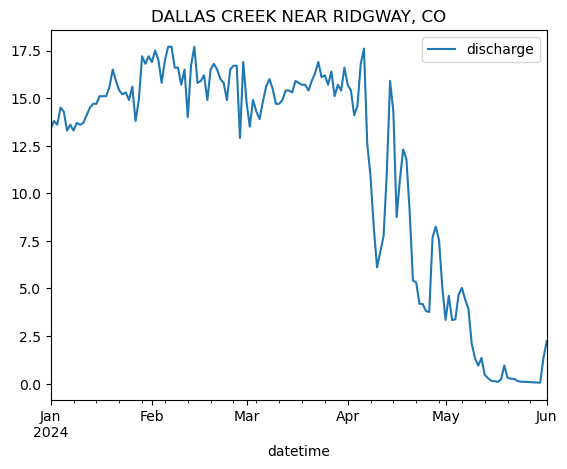

In [3]:
nwisdf = df[['datetime','site_no', 'discharge', 'water_year']].copy()
nwisdf[nwisdf.datetime>='2024-01-01'].plot('datetime', 
                                           'discharge',
                                           title = site_name);

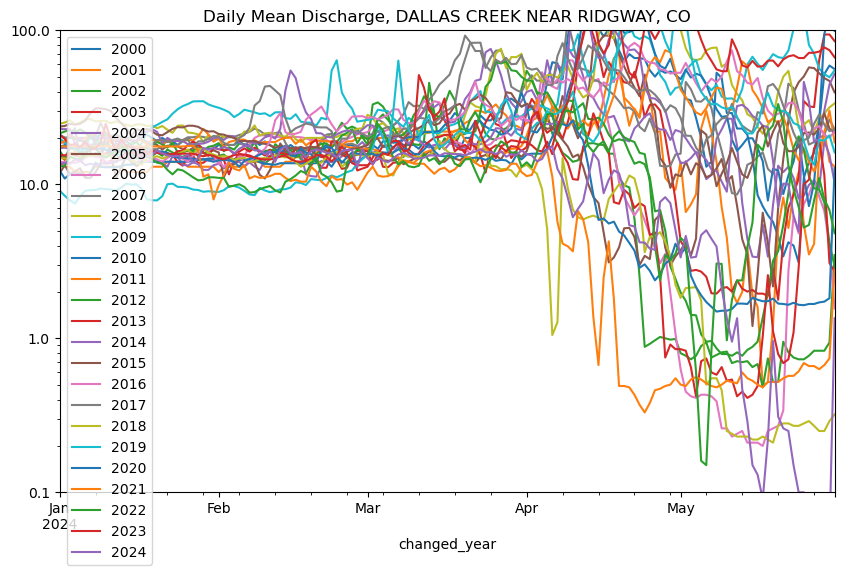

In [4]:
df = nwisdf[nwisdf.datetime.dt.month<6].copy()
df['changed_year'] = pd.to_datetime('2024' + df.datetime.astype(str).str[4:]) 
        # arbitrarily sets year to 2024 for same X scale

fig, ax = plt.subplots(figsize=(10,6))
for label, df in df.groupby('water_year'):
    df.plot(x='changed_year', y='discharge', ax=ax, label=label)
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.legend(loc='upper left')
plt.title(f'Daily Mean Discharge, {site_name}');

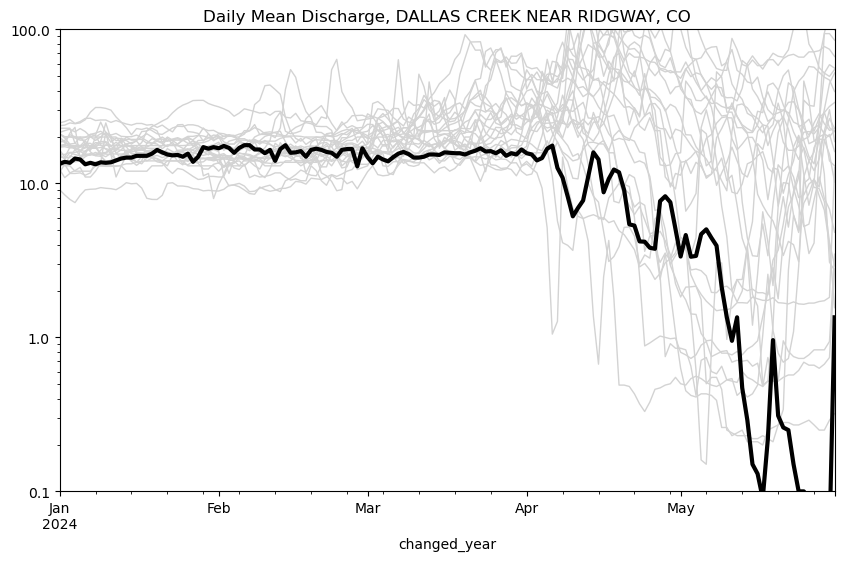

In [5]:
df = nwisdf[nwisdf.datetime.dt.month<6].copy()
df['changed_year'] = pd.to_datetime('2024' + df.datetime.astype(str).str[4:]) # arbitrarily sets year to 2024 for same X scale

fig, ax = plt.subplots(figsize=(10,6))
for label, df in df.groupby('water_year'):
    if label == 2024:
        c = 'black'
        lw = 3.0
    else:
        c = 'lightgrey'
        lw = 1.0
    df.plot(x='changed_year', 
            y='discharge', 
            ax=ax, 
            color=c, 
            linewidth=lw, 
            legend=False,
            title=f'Daily Mean Discharge, {site_name}')
ax.set_yscale('log')
ax.set_ylim([0.1,100])
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.show();

water_year
2000    1981.6
2001     752.8
2002      72.7
2003    1433.1
2004    1115.4
2005    1817.6
2006     188.9
2007    2001.3
2008    3866.0
2009    5377.1
2010    2810.7
2011    2620.1
2012     391.6
2013     264.2
2014    1813.4
2015    1439.3
2016    3416.7
2017    2220.5
2018      49.2
2019    3014.8
2020     191.1
2021      54.4
2022     705.8
2023    6285.7
2024     121.9
Name: discharge, dtype: float64


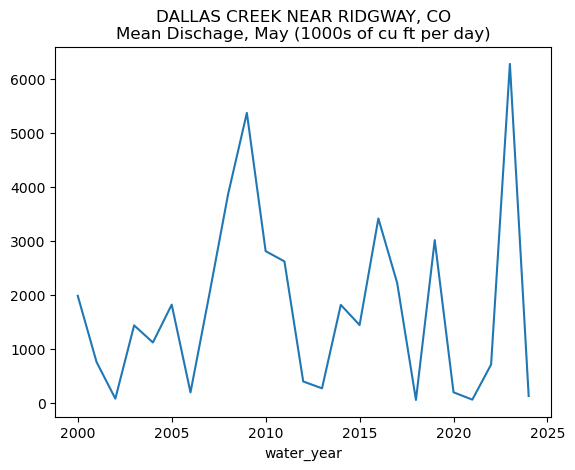

In [6]:
month = 5
df = nwisdf.copy()
df = df[df.datetime.dt.month == month].groupby('water_year').discharge.mean()
df = round(df * 3600*24/1000, 1)
df.plot(title = f'{site_name}\n' +
        f'Mean Dischage, {month_name[month]} (1000s of cu ft per day)');
print(df)